<a href="https://colab.research.google.com/github/ladyvifra/telecom-x-churn-ml/blob/main/TelecomX_LATAM_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/ladyvifra/telecom-x-churn-ml/refs/heads/main/data/datos_limpios.csv"
df = pd.read_csv(url)

df.head()


,customerid,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges.monthly,charges.total,cuentas_diarias
0,0002-ORFBO,0.0,female,0,yes,yes,9,yes,no,dsl,...,no,yes,yes,no,one year,yes,mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0.0,male,0,no,no,9,yes,yes,dsl,...,no,no,no,yes,month-to-month,no,mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1.0,male,0,no,no,4,yes,no,fiber optic,...,yes,no,no,no,month-to-month,yes,electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1.0,male,1,yes,no,13,yes,no,fiber optic,...,yes,no,yes,yes,month-to-month,yes,electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1.0,female,1,yes,no,3,yes,no,fiber optic,...,no,yes,yes,no,month-to-month,yes,mailed check,83.9,267.40,2.796667


##**Preparación de los datos**

###Eliminación de Columnas Irrelevantes

In [2]:
# Verificamos las columnas disponibles
df.columns


Index(['customerid', 'churn', 'gender', 'seniorcitizen', 'partner',
       'dependents', 'tenure', 'phoneservice', 'multiplelines',
       'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection',
       'techsupport', 'streamingtv', 'streamingmovies', 'contract',
       'paperlessbilling', 'paymentmethod', 'charges.monthly', 'charges.total',
       'cuentas_diarias'],
      dtype='object')

In [3]:
# Normalizar nombres de columnas (todo en minúsculas y sin puntos)
df.columns = df.columns.str.lower().str.replace(".", "_")

print(df.columns)

Index(['customerid', 'churn', 'gender', 'seniorcitizen', 'partner',
       'dependents', 'tenure', 'phoneservice', 'multiplelines',
       'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection',
       'techsupport', 'streamingtv', 'streamingmovies', 'contract',
       'paperlessbilling', 'paymentmethod', 'charges_monthly', 'charges_total',
       'cuentas_diarias'],
      dtype='object')


In [4]:
# Eliminar columnas que no aportan al modelo
df = df.drop(columns=['customerid'])

# Revisar nuevamente las columnas
df.columns


Index(['churn', 'gender', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod',
       'charges_monthly', 'charges_total', 'cuentas_diarias'],
      dtype='object')

###Encoding

In [6]:
# Identificar columnas categóricas
cat_cols = df.select_dtypes(include=["object"]).columns
print("Columnas categóricas:", cat_cols.tolist())


Columnas categóricas: ['gender', 'partner', 'dependents', 'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod']


In [7]:
# One-Hot Encoding con pandas
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [8]:
df_encoded.head()

,churn,seniorcitizen,tenure,charges_monthly,charges_total,cuentas_diarias,gender_male,partner_yes,dependents_yes,phoneservice_yes,...,deviceprotection_yes,techsupport_yes,streamingtv_yes,streamingmovies_yes,contract_one year,contract_two year,paperlessbilling_yes,paymentmethod_credit card (automatic),paymentmethod_electronic check,paymentmethod_mailed check
0,0.0,0,9,65.6,593.30,2.186667,False,True,True,True,...,False,True,True,False,True,False,True,False,False,True
1,0.0,0,9,59.9,542.40,1.996667,True,False,False,True,...,False,False,False,True,False,False,False,False,False,True
2,1.0,0,4,73.9,280.85,2.463333,True,False,False,True,...,True,False,False,False,False,False,True,False,True,False
3,1.0,1,13,98.0,1237.85,3.266667,True,True,False,True,...,True,False,True,True,False,False,True,False,True,False
4,1.0,1,3,83.9,267.40,2.796667,False,True,False,True,...,False,True,True,False,False,False,True,False,False,True


####Columnas principales:

- Target (churn)

- Demográficas: seniorcitizen, gender_male, partner_yes, dependents_yes

- Relación con el servicio: tenure, charges_monthly, charges_total, cuentas_diarias

- Servicios contratados: phoneservice_yes, deviceprotection_yes, techsupport_yes, streamingtv_yes, streamingmovies_yes

- Contrato y pagos: contract_one year, contract_two year, paperlessbilling_yes, paymentmethod_credit card (automatic), paymentmethod_electronic check, paymentmethod_mailed check

###Verificación de la Proporción de Cancelación (Churn)

In [10]:
# Conteo absoluto
print(df['churn'].value_counts())

# Conteo relativo (proporción)
print(df['churn'].value_counts(normalize=True))


churn
0.0    5174
1.0    1869
Name: count, dtype: int64
churn
0.0    0.73463
1.0    0.26537
Name: proportion, dtype: float64


Clientes que permanecieron activos (churn = 0.0) → 73.46%

Clientes que cancelaron (churn = 1.0) → 26.54%

###Balanceo de Clases

In [11]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd

In [12]:
X = df_encoded.drop("churn", axis=1)  # features
y = df_encoded["churn"]               # target

In [14]:
print(y.isnull().sum())
print(y.value_counts(dropna=False))

224
churn
0.0    5174
1.0    1869
NaN     224
Name: count, dtype: int64


In [15]:
# Eliminar filas donde churn es NaN
mask = y.notna()
X = X[mask]
y = y[mask]

print("Valores en churn después de limpiar:")
print(y.value_counts())


Valores en churn después de limpiar:
churn
0.0    5174
1.0    1869
Name: count, dtype: int64


In [17]:
# 1. Undersampling (reduce la clase mayoritaria)
under = RandomUnderSampler(sampling_strategy=1.0, random_state=42)
X_under, y_under = under.fit_resample(X, y)
print("Undersampling:", y_under.value_counts(normalize=True))

# 2. Oversampling (duplica aleatoriamente la clase minoritaria)
over = RandomOverSampler(sampling_strategy=1.0, random_state=42)
X_over, y_over = over.fit_resample(X, y)
print("Oversampling:", y_over.value_counts(normalize=True))

# 3. SMOTE (genera ejemplos sintéticos de la clase minoritaria)
smote = SMOTE(sampling_strategy=1.0, random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)
print("SMOTE:", y_smote.value_counts(normalize=True))

Undersampling: churn
0.0    0.5
1.0    0.5
Name: proportion, dtype: float64
Oversampling: churn
0.0    0.5
1.0    0.5
Name: proportion, dtype: float64
SMOTE: churn
0.0    0.5
1.0    0.5
Name: proportion, dtype: float64


###Normalización o Estandarización

In [19]:
# Elegimos los datos balanceados por SMOTE
X_balanced = X_smote
y_balanced = y_smote

In [20]:
from sklearn.preprocessing import MinMaxScaler

# Seleccionamos solo las columnas numéricas
numerical_cols = X_balanced.select_dtypes(include=['int64', 'float64']).columns

# Inicializamos el escalador
scaler = MinMaxScaler()

# Aplicamos la normalización solo a las columnas numéricas
X_balanced_scaled = X_balanced.copy()
X_balanced_scaled[numerical_cols] = scaler.fit_transform(X_balanced[numerical_cols])

# Verificamos los primeros registros
X_balanced_scaled.head()


,seniorcitizen,tenure,charges_monthly,charges_total,cuentas_diarias,gender_male,partner_yes,dependents_yes,phoneservice_yes,multiplelines_yes,...,deviceprotection_yes,techsupport_yes,streamingtv_yes,streamingmovies_yes,contract_one year,contract_two year,paperlessbilling_yes,paymentmethod_credit card (automatic),paymentmethod_electronic check,paymentmethod_mailed check
0,0.0,0.125000,0.471144,0.068315,0.471144,False,True,True,True,False,...,False,True,True,False,True,False,True,False,False,True
1,0.0,0.125000,0.414428,0.062454,0.414428,True,False,False,True,True,...,False,False,False,True,False,False,False,False,False,True
2,0.0,0.055556,0.553731,0.032338,0.553731,True,False,False,True,False,...,True,False,False,False,False,False,True,False,True,False
3,1.0,0.180556,0.793532,0.142531,0.793532,True,True,False,True,False,...,True,False,True,True,False,False,True,False,True,False
4,1.0,0.041667,0.653234,0.030789,0.653234,False,True,False,True,False,...,False,True,True,False,False,False,True,False,False,True


##**🎯 Correlación y Selección de Variables**

###Análisis de Correlación

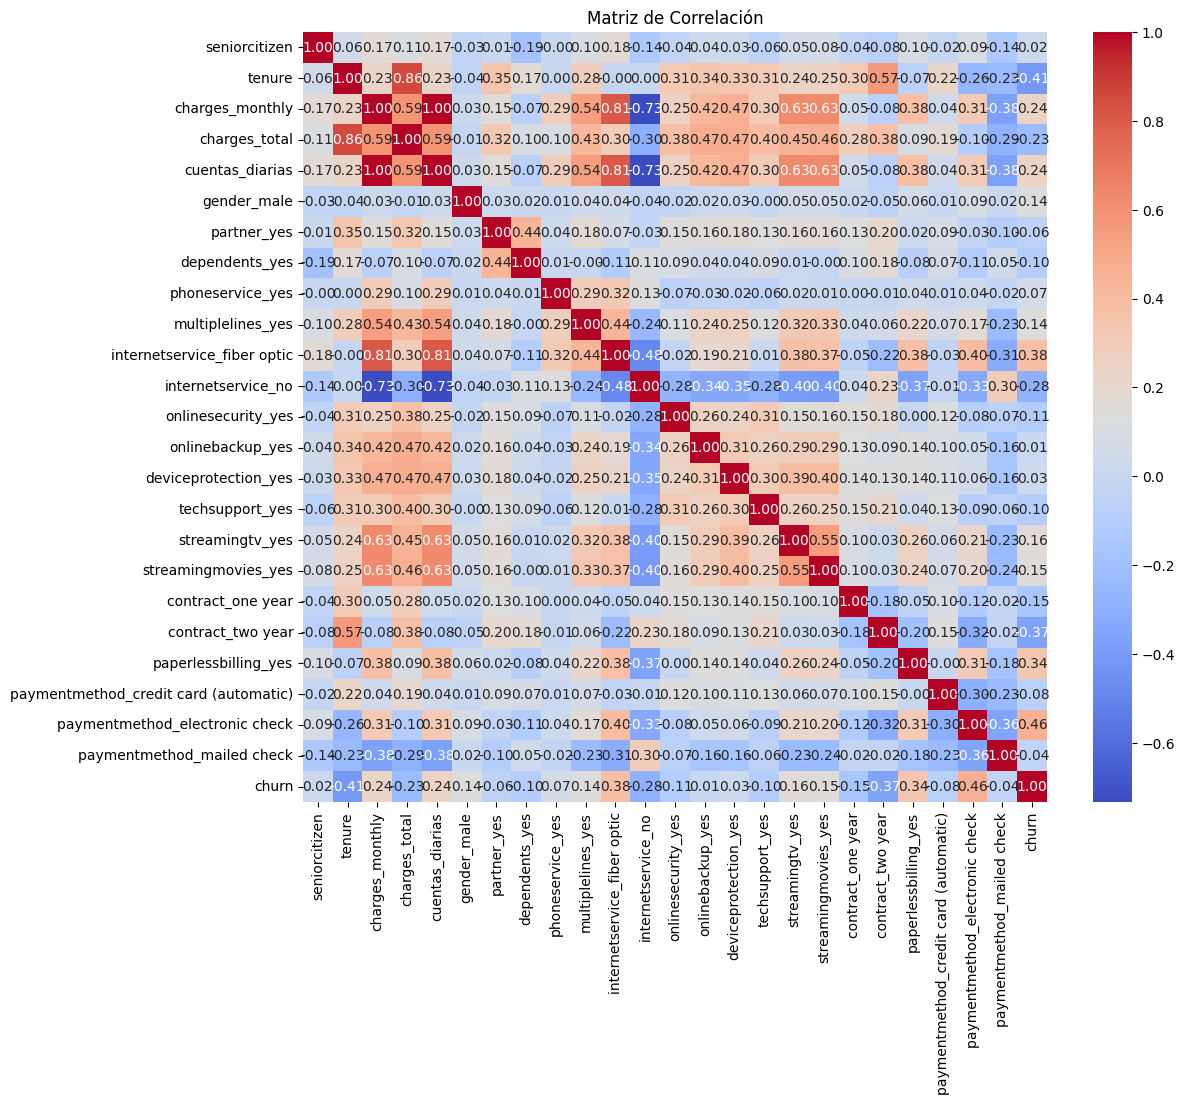

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Concatenamos X_balanced_scaled con el target y_balanced
data_corr = pd.concat([X_balanced_scaled, y_balanced], axis=1)

# Calculamos la matriz de correlación
corr_matrix = data_corr.corr()

# Visualizamos la matriz con un mapa de calor
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Matriz de Correlación")
plt.show()


In [22]:
# Correlación de cada variable con churn
corr_churn = corr_matrix['churn'].sort_values(ascending=False)

# Mostramos el ranking
print("Correlación de las variables con churn:\n")
print(corr_churn)


Correlación de las variables con churn:

churn                                    1.000000
paymentmethod_electronic check           0.461497
internetservice_fiber optic              0.378470
paperlessbilling_yes                     0.342487
cuentas_diarias                          0.235715
charges_monthly                          0.235715
streamingtv_yes                          0.161741
streamingmovies_yes                      0.153576
multiplelines_yes                        0.143506
gender_male                              0.139635
phoneservice_yes                         0.065108
deviceprotection_yes                     0.032081
seniorcitizen                            0.018936
onlinebackup_yes                         0.007198
paymentmethod_mailed check              -0.036616
partner_yes                             -0.055083
paymentmethod_credit card (automatic)   -0.077556
techsupport_yes                         -0.098342
dependents_yes                          -0.099172
onlinesec

###Análisis dirigido

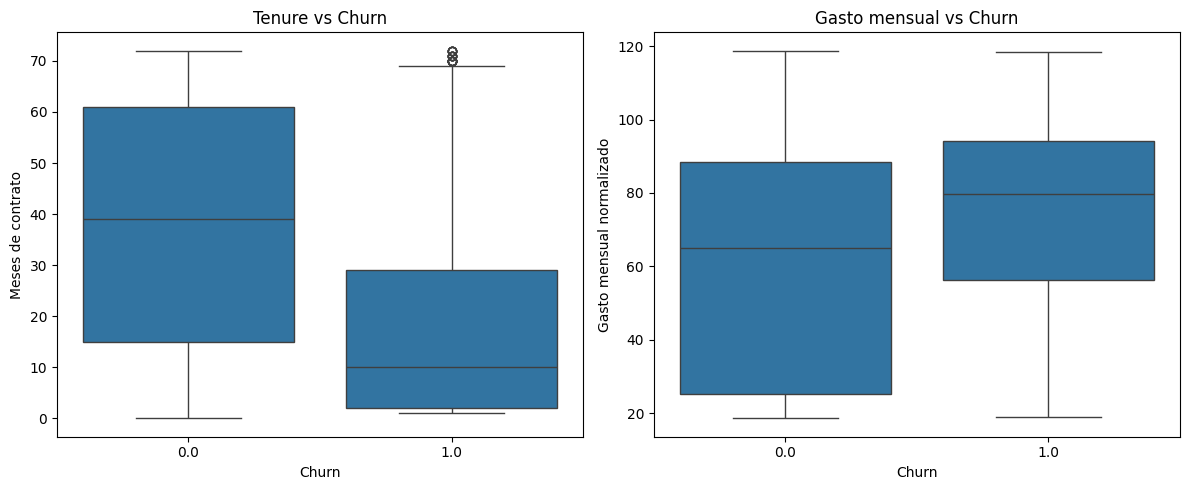

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Un tamaño de figura adecuado
plt.figure(figsize=(12, 5))

# 1️⃣ Tiempo de contrato (tenure) vs Churn
plt.subplot(1, 2, 1)
sns.boxplot(x=y_under, y=X_under['tenure'])
plt.title('Tenure vs Churn')
plt.xlabel('Churn')
plt.ylabel('Meses de contrato')

# 2️⃣ Gasto mensual (charges_monthly) vs Churn
plt.subplot(1, 2, 2)
sns.boxplot(x=y_under, y=X_under['charges_monthly'])
plt.title('Gasto mensual vs Churn')
plt.xlabel('Churn')
plt.ylabel('Gasto mensual normalizado')

plt.tight_layout()
plt.show()


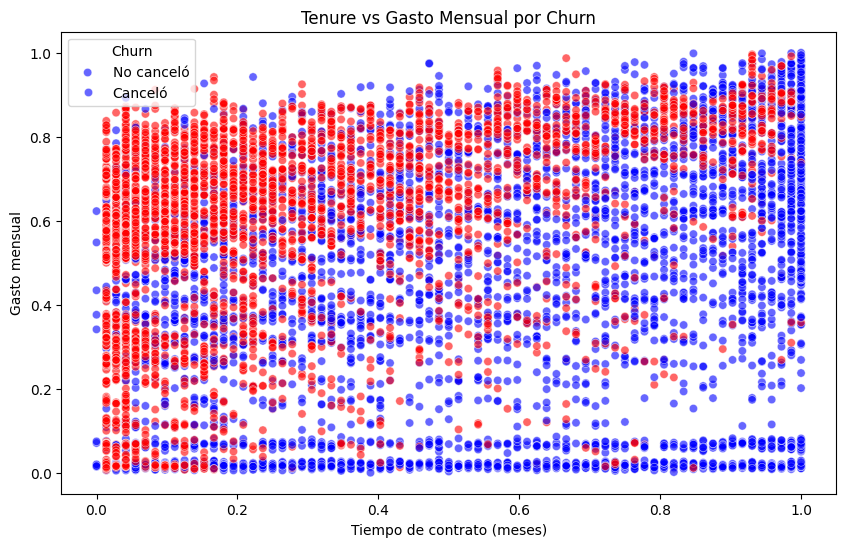

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Combinamos X y y para tener churn junto con las variables
df_plot = X_balanced_scaled.copy()
df_plot['churn'] = y_balanced.values

# Scatter plot: tenure vs charges_monthly
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df_plot,
    x='tenure',
    y='charges_monthly',
    hue='churn',
    palette={0:'blue', 1:'red'},
    alpha=0.6
)
plt.title('Tenure vs Gasto Mensual por Churn')
plt.xlabel('Tiempo de contrato (meses)')
plt.ylabel('Gasto mensual')
plt.legend(title='Churn', labels=['No canceló', 'Canceló'])
plt.show()


Clientes que cancelan (puntos rojos)

Se concentran en tiempo de contrato bajo (casi al inicio, valores bajos en tenure).

Tienen gasto mensual relativamente alto (0.4 a 0.9 en escala normalizada).
→ Esto indica que los clientes con contratos recientes y altos pagos son más propensos a cancelar.

Clientes que permanecen (puntos azules)

Están en contratos más largos (valores altos en tenure).

Su gasto mensual es más variado, desde bajo hasta alto.
→ Clientes de largo plazo son más estables, aunque algunos con gasto alto aún permanecen.

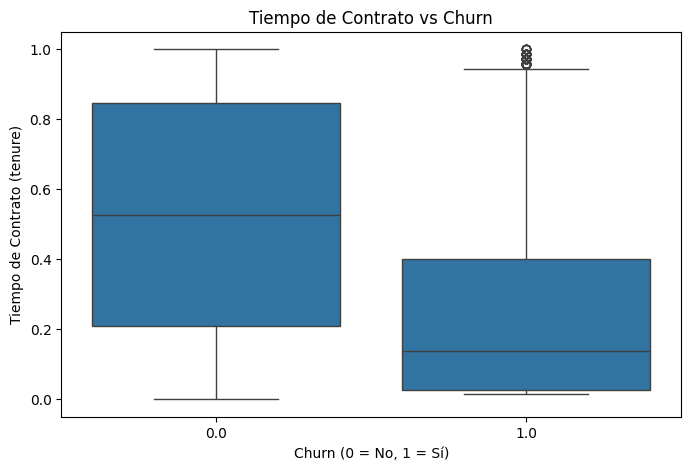

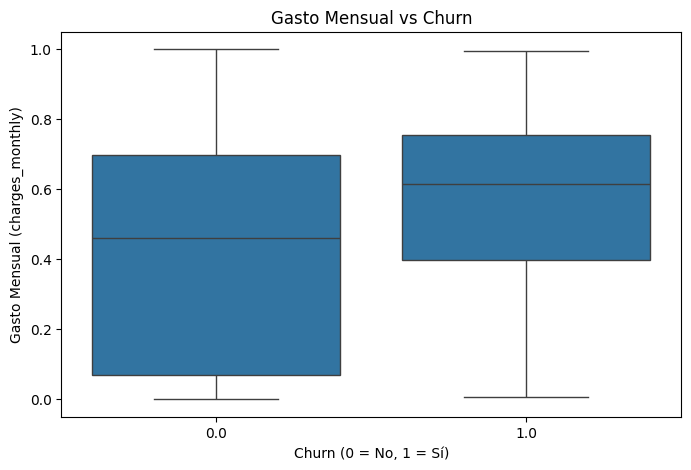

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot de tiempo de contrato vs churn
plt.figure(figsize=(8,5))
sns.boxplot(x=y_balanced, y=X_balanced_scaled['tenure'])
plt.title('Tiempo de Contrato vs Churn')
plt.xlabel('Churn (0 = No, 1 = Sí)')
plt.ylabel('Tiempo de Contrato (tenure)')
plt.show()

# Boxplot de gasto mensual vs churn
plt.figure(figsize=(8,5))
sns.boxplot(x=y_balanced, y=X_balanced_scaled['charges_monthly'])
plt.title('Gasto Mensual vs Churn')
plt.xlabel('Churn (0 = No, 1 = Sí)')
plt.ylabel('Gasto Mensual (charges_monthly)')
plt.show()


La duración del contrato está inversamente relacionada con la cancelación: a menor duración, más cancelaciones; a mayor duración, menos cancelaciones.

Existe una tendencia positiva entre gasto mensual y probabilidad de churn: a mayor gasto, mayor es la probabilidad de que el cliente cancele. Esto puede ser un indicador importante para el modelo predictivo, ya que el gasto mensual parece ser un factor relevante en la cancelación.

##**Modelado Predictivo**

###Separación de los datos

In [26]:
from sklearn.model_selection import train_test_split

# Dividimos el dataset en 70% entrenamiento y 30% prueba
X_train, X_test, y_train, y_test = train_test_split(
    X_balanced_scaled, y_balanced, test_size=0.3, random_state=42, stratify=y_balanced
)

# Verificamos tamaños
print("Tamaño entrenamiento:", X_train.shape, y_train.shape)
print("Tamaño prueba:", X_test.shape, y_test.shape)


Tamaño entrenamiento: (7243, 24) (7243,)
Tamaño prueba: (3105, 24) (3105,)


### Creación de modelos

####Regresión Logística

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Inicializamos el modelo
log_reg = LogisticRegression(random_state=42, max_iter=1000)

# Entrenamos con los datos normalizados (ya están en X_train)
log_reg.fit(X_train, y_train)

# Predecimos sobre el conjunto de prueba
y_pred_log = log_reg.predict(X_test)

# Evaluamos
print("Regresión Logística")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_log))
print("Reporte de Clasificación:\n", classification_report(y_test, y_pred_log))



Regresión Logística
Accuracy: 0.8106280193236715
Matriz de Confusión:
 [[1249  304]
 [ 284 1268]]
Reporte de Clasificación:
               precision    recall  f1-score   support

         0.0       0.81      0.80      0.81      1553
         1.0       0.81      0.82      0.81      1552

    accuracy                           0.81      3105
   macro avg       0.81      0.81      0.81      3105
weighted avg       0.81      0.81      0.81      3105



####Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier

# Inicializamos el modelo
rf = RandomForestClassifier(random_state=42, n_estimators=100)

# Entrenamos con los datos originales (no escalados)
rf.fit(X_train, y_train)

# Predecimos sobre el conjunto de prueba
y_pred_rf = rf.predict(X_test)

# Evaluamos
print("Random Forest")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_rf))
print("Reporte de Clasificación:\n", classification_report(y_test, y_pred_rf))


Random Forest
Accuracy: 0.8402576489533011
Matriz de Confusión:
 [[1290  263]
 [ 233 1319]]
Reporte de Clasificación:
               precision    recall  f1-score   support

         0.0       0.85      0.83      0.84      1553
         1.0       0.83      0.85      0.84      1552

    accuracy                           0.84      3105
   macro avg       0.84      0.84      0.84      3105
weighted avg       0.84      0.84      0.84      3105



                           feature  importance
3                    charges_total    0.149028
1                           tenure    0.144757
2                  charges_monthly    0.112830
4                  cuentas_diarias    0.109840
22  paymentmethod_electronic check    0.096110
19               contract_two year    0.049335
10     internetservice_fiber optic    0.048757
20            paperlessbilling_yes    0.039314
18               contract_one year    0.025513
5                      gender_male    0.021479


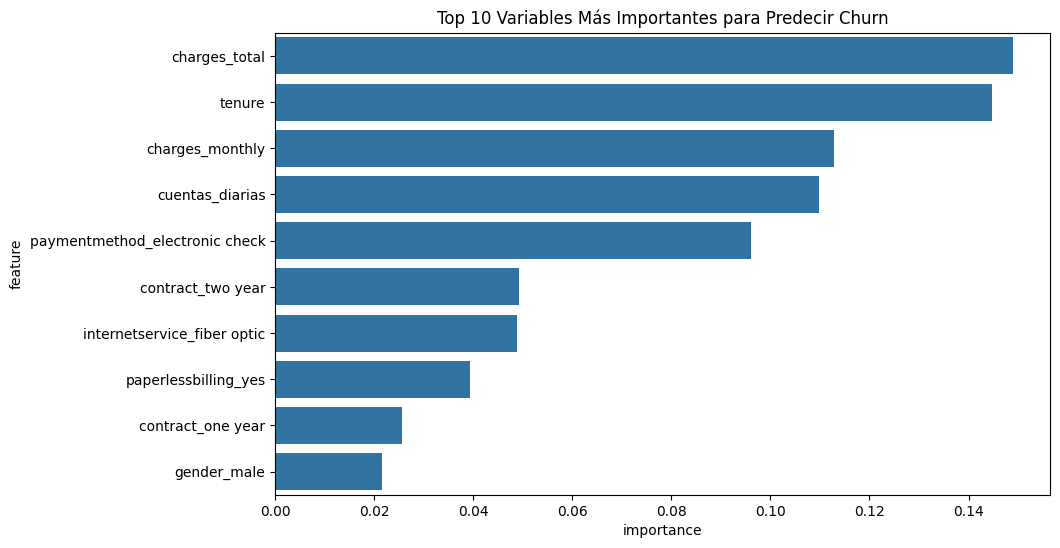

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Obtenemos la importancia de cada variable
importances = rf.feature_importances_

# Creamos un DataFrame con nombres de columnas e importancia
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': importances
})

# Ordenamos de mayor a menor importancia
feature_importance = feature_importance.sort_values(by='importance', ascending=False)

# Mostramos las top 10
print(feature_importance.head(10))

# Visualizamos con un gráfico de barras
plt.figure(figsize=(10,6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(10))
plt.title("Top 10 Variables Más Importantes para Predecir Churn")
plt.show()


###Evaluación de modelos

####**Análisis**
- **Exactitud (Accuracy)**:

Random Forest tiene mayor accuracy (0.84) frente a la Regresión Logística (0.81), por lo que en general predice mejor la clase correcta.

- **Precisión y Recall**:

Ambos modelos tienen métricas bastante equilibradas entre las clases.

Random Forest muestra un poco mejor desempeño tanto en la clase 0 (no churn) como en la clase 1 (churn).

- **Overfitting / Underfitting:**

*Random Forest*:

Accuracy ligeramente mayor que la Regresión Logística, pero no excesivamente alta. Probablemente no hay overfitting grave, aunque se puede comprobar comparando accuracy en entrenamiento vs prueba.

*Regresión Logística*:

Un modelo más simple. Accuracy más baja, pero consistente con la naturaleza del modelo. Probablemente no hay underfitting crítico, aunque es más “conservador” frente a patrones complejos.

**Matriz de confusión**:

Random Forest reduce un poco más los falsos negativos y falsos positivos en comparación con la Regresión Logística. Esto indica que captura mejor la clase minoritaria (churn = 1).

####**Conclusión**
Mejor modelo: Random Forest, porque combina mayor accuracy y un balance sólido entre precision y recall.

##**📋 Interpretación y Conclusiones**

###Análisis de la Importancia de las Variables

*Regresión logística*
En regresión logística, los coeficientes (coef_) de cada variable indican el efecto de esa variable sobre la probabilidad de que ocurra la cancelación (churn = 1).

In [33]:
coef_df = pd.DataFrame({
    'feature': X_train.columns,
    'coefficient': log_reg.coef_[0]
}).sort_values(by='coefficient', key=abs, ascending=False)

coef_df.head(10)



,feature,coefficient
2,charges_monthly,-7.346961
4,cuentas_diarias,-7.346961
10,internetservice_fiber optic,4.507625
1,tenure,-4.450619
11,internetservice_no,-3.834111
8,phoneservice_yes,2.381804
3,charges_total,2.005915
16,streamingtv_yes,1.692359
17,streamingmovies_yes,1.594559
22,paymentmethod_electronic check,1.447640


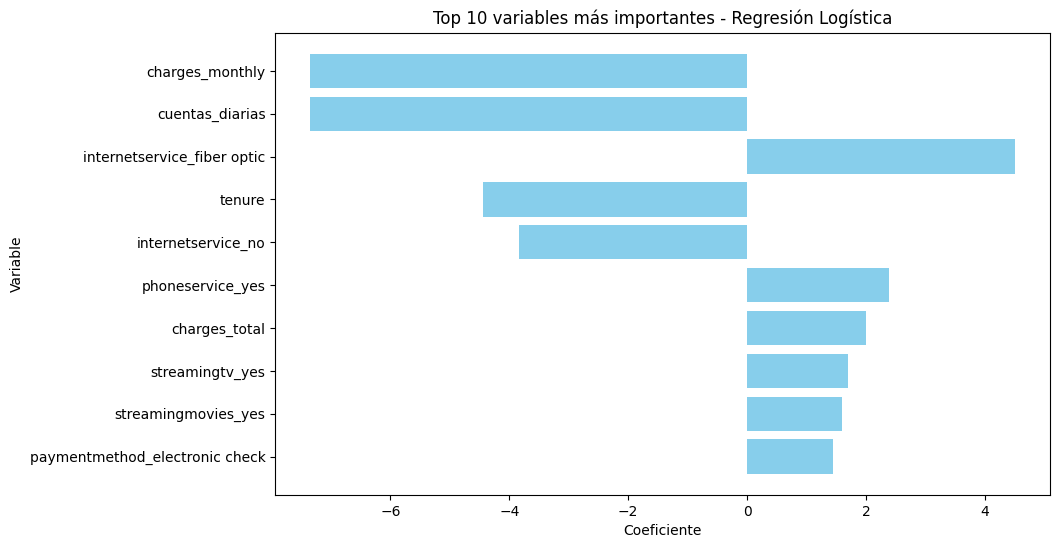

In [37]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np



coef_df['abs_coef'] = coef_df['coefficient'].abs()
coef_df_sorted = coef_df.sort_values(by='abs_coef', ascending=False).head(10)

# Gráfico de barras
plt.figure(figsize=(10,6))
plt.barh(coef_df_sorted['feature'], coef_df_sorted['coefficient'], color='skyblue')
plt.xlabel('Coeficiente')
plt.ylabel('Variable')
plt.title('Top 10 variables más importantes - Regresión Logística')
plt.gca().invert_yaxis()  # Para que la variable más importante aparezca arriba
plt.show()


Probabilidad de canelación teniendo en cuenta los resultado anteriores:

Negativos (como charges_monthly, cuentas_diarias, tenure, internetservice_no): indican que a mayor valor de la variable, menos probable es que el cliente cancele. Por ejemplo, clientes con contratos más largos (tenure) o que no tienen internet (internetservice_no) tienden a quedarse.

Positivos (como internetservice_fiber optic, phoneservice_yes, streamingtv_yes): indican que a mayor valor, más probable es que el cliente cancele. Por ejemplo, clientes con internet de fibra óptica (internetservice_fiber optic) o suscripción a servicios adicionales como TV o streaming tienen más probabilidad de cancelar.

Las magnitudes muestran la fuerza de influencia de cada variable. Por ejemplo, charges_monthly y cuentas_diarias tienen coeficientes muy grandes negativos, lo que sugiere que son muy importantes para la predicción.

*Random Forest*

In [38]:
# Crear DataFrame con la importancia de las variables
rf_importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf.feature_importances_
})

# Ordenamos de mayor a menor importancia
rf_importance_df = rf_importance_df.sort_values(by='importance', ascending=False)

# Mostramos las 10 variables más importantes
rf_importance_df.head(10)


,feature,importance
3,charges_total,0.149028
1,tenure,0.144757
2,charges_monthly,0.112830
4,cuentas_diarias,0.109840
22,paymentmethod_electronic check,0.096110
19,contract_two year,0.049335
10,internetservice_fiber optic,0.048757
20,paperlessbilling_yes,0.039314
18,contract_one year,0.025513
5,gender_male,0.021479


/tmp/ipython-input-3080767028.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=top_features, palette='viridis')


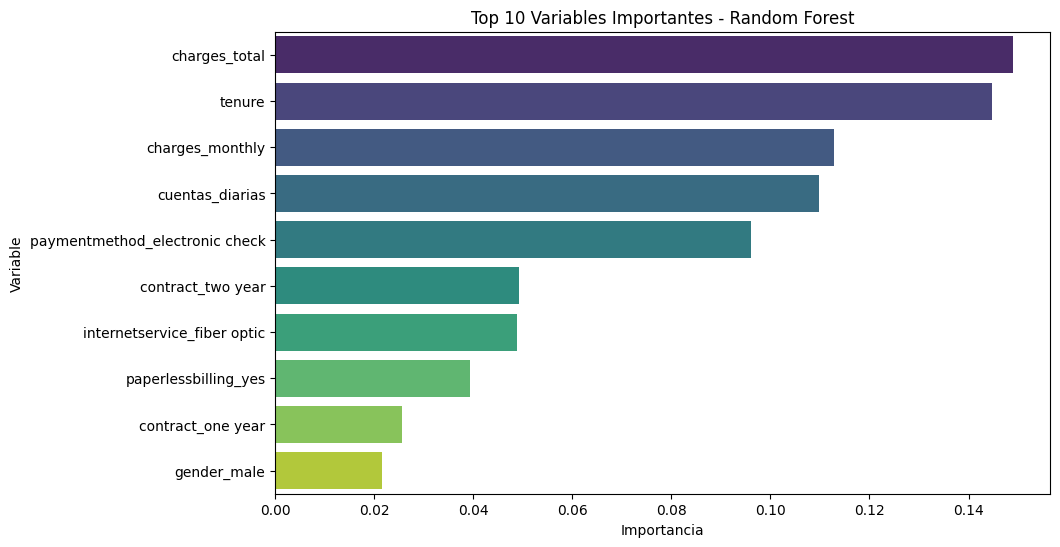

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tomamos las 10 variables más importantes
top_features = rf_importance_df.head(10)

# Configuración del gráfico
plt.figure(figsize=(10,6))
sns.barplot(x='importance', y='feature', data=top_features, palette='viridis')
plt.title('Top 10 Variables Importantes - Random Forest')
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.show()


Estas variables muestran cómo Random Forest pondera cada característica para reducir la impureza en sus árboles, indicando qué factores son más determinantes para predecir la cancelación del cliente.

##Conclusiones

###**Informe de Análisis Predictivo de Cancelación de Clientes – TelecomX LATAM**

####Objetivo####

l objetivo de este análisis fue identificar los factores que más influyen en la cancelación de clientes (churn) en TelecomX LATAM y construir modelos predictivos que permitan anticipar qué clientes tienen mayor probabilidad de cancelar sus servicios.

####Preparación y Limpieza de Datos####

Se eliminaron columnas irrelevantes para el análisis, como customerid, ya que no aportan valor predictivo y pueden afectar el desempeño de los modelos.

Se transformaron todas las variables categóricas a formato numérico mediante One-Hot Encoding.

Se detectó un desbalance en la variable objetivo churn (73% clientes activos vs 26% cancelaciones). Para equilibrar las clases se aplicaron tres técnicas: Undersampling, Oversampling y SMOTE, logrando una distribución 50%-50%.

Se normalizaron las variables numéricas para los modelos sensibles a la escala, como Regresión Logística.

####Exploración####

a correlación de las variables con la cancelación mostró que los factores con mayor relación positiva son:

paymentmethod_electronic check (0.46)

internetservice_fiber optic (0.38)

paperlessbilling_yes (0.34)

cuentas_diarias y charges_monthly (~0.24)

Los boxplots revelaron que:

Clientes con contratos más cortos y mayor gasto mensual tienden a cancelar más.

Clientes con contratos largos (1-2 años) presentan menor churn.

####Modelado Predictivo####

Se construyeron dos modelos con diferentes características:

***Modelo 1 – Regresión Logística***

Datos normalizados.

Exactitud: 81%

F1-score: 0.81

Variables más relevantes (coeficientes):

Mayor impacto positivo en churn: internetservice_fiber optic, phoneservice_yes, streamingtv_yes.

Mayor impacto negativo en churn: charges_monthly, cuentas_diarias, tenure.

Interpretación: clientes con contratos más cortos y servicios de fibra óptica o servicios adicionales tienden a cancelar más.

***Modelo 2 – Random Forest***

No requiere normalización.

Exactitud: 84%

F1-score: 0.84

Variables más importantes:

charges_total

tenure

charges_monthly

cuentas_diarias

paymentmethod_electronic check

Interpretación: los gastos totales y mensuales, así como la duración del contrato, son determinantes para la predicción de churn.

Comparación de Modelos:

Random Forest mostró un mejor desempeño general que Regresión Logística.

Ambos modelos lograron un balance adecuado entre precisión y recall, sin signos evidentes de overfitting.

####Conclusiones####

En conclusión, el análisis reveló que los factores que más influyen en la cancelación de clientes de TelecomX LATAM son el método de pago electrónico, la duración del contrato, el tipo de servicio de internet (fibra óptica) y los gastos mensuales y totales. Los modelos predictivos, especialmente Random Forest, mostraron un buen desempeño en la identificación de clientes con mayor riesgo de churn, lo que permite priorizar estrategias de retención. Se recomienda incentivar la renovación de contratos largos, ofrecer planes de pago flexibles, monitorear clientes con alto gasto y servicios específicos para proponer paquetes personalizados, y generar campañas de fidelización para clientes nuevos o con baja antigüedad. Como próximos pasos, se sugiere explorar modelos de boosting como XGBoost para mejorar la precisión de la predicción, implementar un sistema de alertas para detectar clientes en riesgo y validar las estrategias de retención mediante pruebas A/B que permitan medir su efectividad de manera objetiva.